This notebook produces explanations using the coefficients of the SVC

In [9]:
import sys
import pickle
import warnings
import numpy as np
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [10]:
# load, clean and shape the data
train_data = pd.read_pickle('../data/explainability_input/train_data.pkl')
x_train_data = train_data.drop(columns=['id', 'date', 'cluster'])
test_data = pd.read_pickle('../data/explainability_input/test_data.pkl')
x_test_data = test_data.drop(columns=['id', 'date', 'cluster'])
x_test_data

,exertion_points,step_goal,minutes_below_zone_1,minutes_in_zone_1,steps,very_active_minutes,minutes_in_zone_2,minutes_in_zone_3,altitude,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,exercises,exercise_duration,sleep_points,sleep_duration,calories
0,0.622928,0.0,0.936806,0.081134,0.017563,0.080685,0.0,0.0,0.0,0.254701,0.083045,0.495139,0.074074,0.001865,0.810469,0.0,0.029382
1,0.622928,0.0,0.936806,0.081134,0.000000,0.080685,0.0,0.0,0.0,0.254701,0.083045,0.495139,0.074074,0.001865,0.810469,0.0,0.002914
2,0.622928,0.0,0.936806,0.081134,0.046184,0.080685,0.0,0.0,0.0,0.254701,0.083045,0.495139,0.074074,0.001865,0.810469,0.0,0.000729
3,0.622928,0.0,0.936806,0.081134,0.002661,0.080685,0.0,0.0,0.0,0.254701,0.083045,0.495139,0.074074,0.001865,0.810469,0.0,0.012860
4,0.622928,0.0,0.936806,0.081134,0.000000,0.080685,0.0,0.0,0.0,0.254701,0.083045,0.495139,0.074074,0.001865,0.810469,0.0,0.003315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30303,0.573594,0.0,0.139583,0.280547,0.089133,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.606043,0.0,0.001348
30304,0.573594,0.0,0.139583,0.280547,0.089133,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.606043,0.0,0.001348
30305,0.573594,0.0,0.139583,0.280547,0.089133,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.606043,0.0,0.001348
30306,0.573594,0.0,0.139583,0.280547,0.089133,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.606043,0.0,0.001348


In [11]:
# load the model
with open('../models/svc.pkl', 'rb') as file:  
    model = pickle.load(file)

In [12]:
# extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_
# these explanations are local so they are the same for all instances
print('Features coefficients:', coefficients)
print('Features intercept:', intercept)

Features coefficients: [  8.50087945   5.01706771  12.64544389   0.90482132  -0.06125832
   1.39671311  -3.59850066  -0.16229512   1.73828832  11.97879419
   3.68964145 -15.93349892  -0.17482929  -0.03438579   6.65546008
   0.           0.02605601]
Features intercept: [-7.96798485]


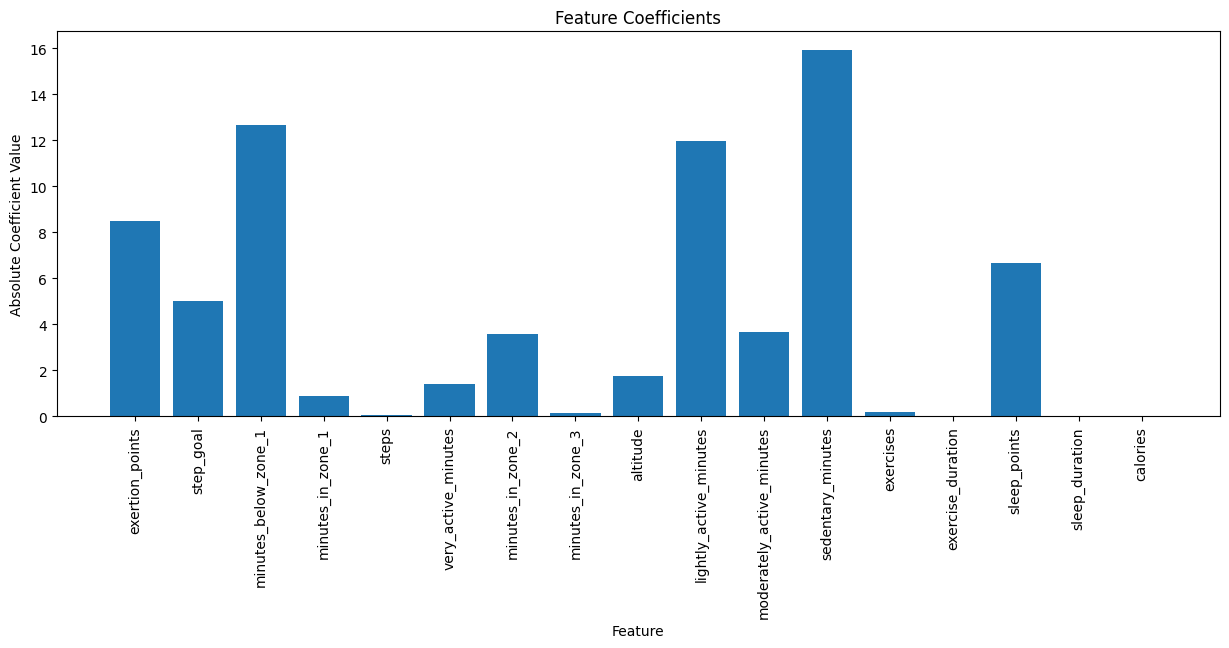

In [13]:
# visualize the absolute coefficients - absolute impact on decision boundary
plt.figure(figsize=(15, 5))
plt.bar(model.feature_names_in_ , np.abs(coefficients))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

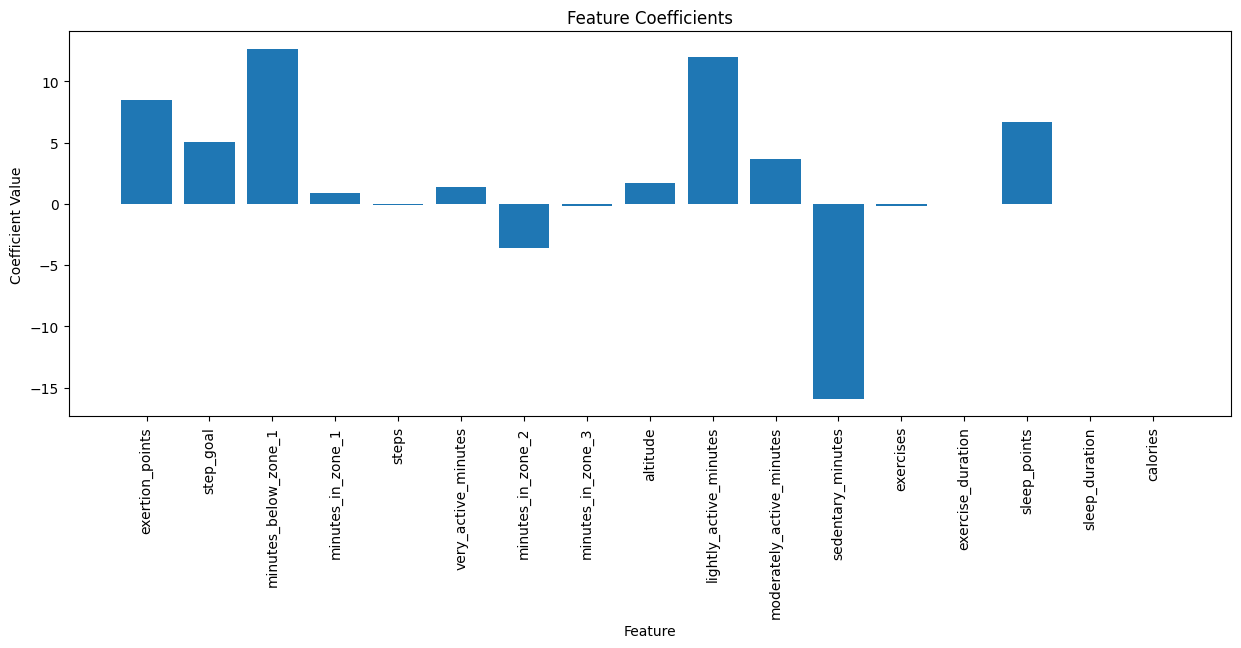

In [14]:
# visualize the absolute coefficients - actual impact on decision boundary
plt.figure(figsize=(15, 5))
plt.bar(model.feature_names_in_ , coefficients)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()